<a href="https://colab.research.google.com/github/danvasem/pytorch-ex/blob/master/Clase_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt


#Construyendo modelo

In [11]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Files already downloaded and verified
Files already downloaded and verified


In [12]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

In [13]:
len(full_data_set)

50000

In [14]:
data_iterator=iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(size):
  print(classes[labels[i]])

deer
cat
cat
truck


In [17]:
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [18]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [19]:
model = nn.Sequential(
    nn.Linear(3*32*32, 512),
    nn.Tanh(),
    nn.Linear(512,2)
)

In [21]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

In [22]:
x=torch.tensor([1.0, 2.0, 3.0])

In [24]:
softmax(x).sum()

tensor(1.)

In [37]:
model = nn.Sequential(
    nn.Linear(3*32*32, 512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

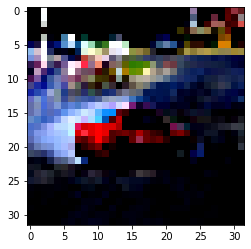

In [38]:
img, label = data_set[20]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [39]:
out=model(img.view(-1).unsqueeze(0))
out

tensor([[0.5385, 0.4615]], grad_fn=<SoftmaxBackward>)

In [40]:
_, index= torch.max(out, dim=1)
print('->',class_names[label],' model:',class_names[index])

-> car  model: car


#Implementando un clasificador totalmente conectado

In [41]:
model = nn.Sequential(
    nn.Linear(3*32*32, 512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)

loss_function = nn.NLLLoss

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


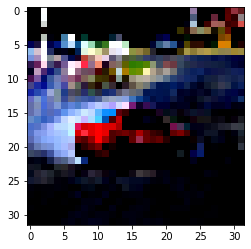

In [43]:
img, label = data_set[20]
plt.imshow(img.permute(1,2,0))
class_names[label]

out=model(img.view(-1).unsqueeze(0))

In [46]:
out=model(img.view(-1).unsqueeze(0))
print(out) 

_, index= torch.max(out, dim=1)
print('->',class_names[label],' model:',class_names[index])

tensor([[-0.6682, -0.7187]], grad_fn=<LogSoftmaxBackward>)
-> car  model: car


In [52]:
model = nn.Sequential(
    nn.Linear(3*32*32, 512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)

lossFunction = nn.NLLLoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
n_epochs=5

for epoch in range(n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = lossFunction(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.013850
Epoch: 1, Loss: 0.001903
Epoch: 2, Loss: 0.381049


KeyboardInterrupt: ignored

In [53]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3*32*32, 512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)

lossFunction = nn.NLLLoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
n_epochs=100

for epoch in range(n_epochs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0],-1))
    loss = lossFunction(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.507628
Epoch: 1, Loss: 0.531746
Epoch: 2, Loss: 0.247424
Epoch: 3, Loss: 0.499004
Epoch: 4, Loss: 0.226853
Epoch: 5, Loss: 0.210900
Epoch: 6, Loss: 0.374100
Epoch: 7, Loss: 0.749324
Epoch: 8, Loss: 0.189813
Epoch: 9, Loss: 0.231410
Epoch: 10, Loss: 0.456128
Epoch: 11, Loss: 0.167771
Epoch: 12, Loss: 0.329478
Epoch: 13, Loss: 0.357037
Epoch: 14, Loss: 0.331678
Epoch: 15, Loss: 0.285554
Epoch: 16, Loss: 0.238805
Epoch: 17, Loss: 0.198159
Epoch: 18, Loss: 0.145475
Epoch: 19, Loss: 0.241025
Epoch: 20, Loss: 0.651712
Epoch: 21, Loss: 0.097248
Epoch: 22, Loss: 0.344230
Epoch: 23, Loss: 0.100354
Epoch: 24, Loss: 0.237567
Epoch: 25, Loss: 0.199736
Epoch: 26, Loss: 0.196568
Epoch: 27, Loss: 0.067945
Epoch: 28, Loss: 0.086792
Epoch: 29, Loss: 0.089872
Epoch: 30, Loss: 0.060113
Epoch: 31, Loss: 0.042041
Epoch: 32, Loss: 0.223786
Epoch: 33, Loss: 0.044091
Epoch: 34, Loss: 0.057546
Epoch: 35, Loss: 0.064610
Epoch: 36, Loss: 0.113834
Epoch: 37, Loss: 0.050201
Epoch: 38, Loss: 0.031

In [54]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.868000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  cat  model: cat


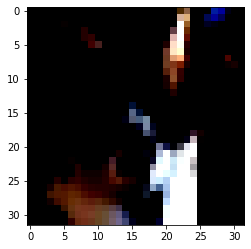

In [58]:
img, label = validation_set[211]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

#Mejoras, limitaciones y conclusiones

In [59]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3*32*32, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128,2)
)

lossFunction = nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)
n_epochs=100

for epoch in range(n_epochs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0],-1))
    loss = lossFunction(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.466794
Epoch: 1, Loss: 0.365607
Epoch: 2, Loss: 0.343167
Epoch: 3, Loss: 0.760975
Epoch: 4, Loss: 0.478982
Epoch: 5, Loss: 0.303194
Epoch: 6, Loss: 0.321312
Epoch: 7, Loss: 0.219898
Epoch: 8, Loss: 0.190878
Epoch: 9, Loss: 0.213284
Epoch: 10, Loss: 0.269903
Epoch: 11, Loss: 0.346801
Epoch: 12, Loss: 0.368026
Epoch: 13, Loss: 0.151815
Epoch: 14, Loss: 0.326558
Epoch: 15, Loss: 0.407601
Epoch: 16, Loss: 0.231072
Epoch: 17, Loss: 0.181899
Epoch: 18, Loss: 0.065042
Epoch: 19, Loss: 0.186036


KeyboardInterrupt: ignored

In [60]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.840500


In [61]:
val_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.927700


In [62]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct: car   model: cat


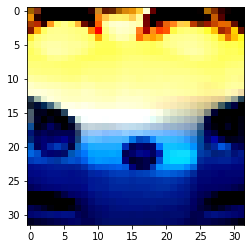

In [63]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))